# Matplotlib 資料視覺化

線上文件，非常詳細：[Python 小白資料視覺化教程](https://www.mdeditor.tw/pl/pkan/zh-tw)


In [1]:
from yahoofinancials import YahooFinancials
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 定義顏色碼

In [2]:
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207

In [3]:
start_date = '2018-04-29'
end_date = '2019-04-29'
stock_code = ['NVDA', 'AMZN', 'BABA', 'FB', 'AAPL']
currency_code = ['EURUSD=X', 'JPY=X', 'CNY=X']

stock = YahooFinancials(stock_code)
currency = YahooFinancials(currency_code)

stock_daily = stock.get_historical_price_data(start_date, end_date, 'daily')
currency_daily = currency.get_historical_price_data(start_date, end_date, 'daily')

# 清理資料

In [4]:
def data_converter(price_data, code, asset):

    if asset == 'FX':
        code = str(code[3:] if code[:3] == 'USD' else code) + '=X'

    columns = ['open', 'close', 'low', 'high']
    price_dict = price_data[code]['prices']
    index = [p['formatted_date'] for p in price_dict]
    price = [[p[c] for c in columns] for p in price_dict]

    data = pd.DataFrame(price, index=pd.Index(index, name='date'), 
                        columns=pd.Index(columns, name='OHLC'))

    return data

In [14]:
EURUSD = data_converter( currency_daily, 'EURUSD', 'FX' )

EURUSD.head(3).append(EURUSD.tail(3))

OHLC,open,close,low,high
date,,,,
2018-04-29,1.212856,1.212283,1.206636,1.213857
2018-04-30,1.208313,1.208123,1.198351,1.208459
2018-05-01,1.199213,1.199156,1.195414,1.203109
2019-04-24,1.115698,1.115349,1.112174,1.116400
2019-04-25,1.113710,1.113685,1.112298,1.117281
2019-04-28,1.114902,1.115026,1.114554,1.116994


In [25]:
NVDA = data_converter( stock_daily, 'NVDA','EQ' )

NVDA.head(3).append(NVDA.tail(3))

OHLC,open,close,low,high
date,,,,
2018-04-30,226.990005,224.899994,224.119995,229.000000
2018-05-01,224.570007,227.139999,222.199997,227.250000
2018-05-02,227.000000,226.309998,225.250000,228.800003
2019-04-24,191.089996,191.169998,188.639999,192.809998
2019-04-25,189.550003,186.910004,183.699997,190.449997
2019-04-26,180.710007,178.089996,173.300003,180.889999


# 直方圖 (histogram chart)，又稱質量分佈圖

由一系列高度不等的縱向條紋或線段表示資料分佈的情況。一般用橫軸表示資料型別，縱軸表示分佈情況

Matplotlib 裡的語法：plt.hist() & ax.hist()

函式 hist() 裡的引數：
* p_NVDA ：Series，也可以是 list 或者 ndarray
* bins ：分成多少堆
* colors ：用之前定義的深青色

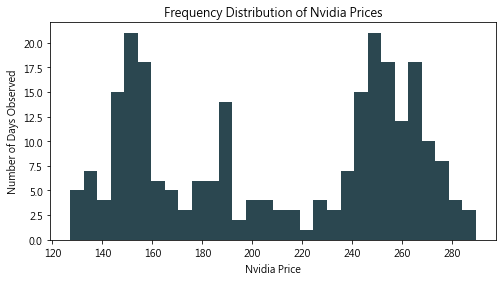

In [18]:
# Nvidia 的價格分佈

p_NVDA = NVDA['close']

fig = plt.figure(figsize=(8,4))

plt.hist(p_NVDA, bins=30, color=dt_hex)
plt.xlabel('Nvidia Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of Nvidia Prices')

plt.show()

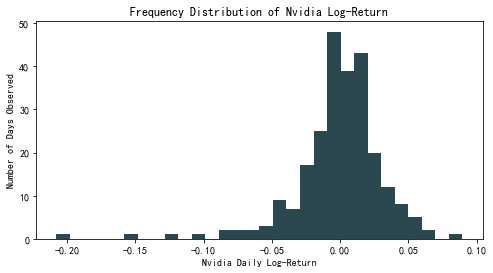

In [29]:
# Nvidia 對數收益 (log-return) 的分佈
# 對數收益的計算公式：r(t) = ln(P(t)/P(t-1)
# 計算一天的收益率需要兩天的價格

# 設定顯示的字體，未設定會出現警告訊息
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False   

date = p_NVDA.index
price = p_NVDA.values
r_NVDA = pd.Series(np.log(price[1:]/price[:-1]), index=date[1:])

fig = plt.figure(figsize=(8,4))

plt.hist(r_NVDA, bins=30, color=dt_hex)
plt.xlabel('Nvidia Daily Log-Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of Nvidia Log-Return')

plt.show()

# 散點圖 (scatter chart) 

用兩組資料構成多個座標點，考察座標點的分佈，判斷兩變數之間是否存在某種關聯的分佈模式

Matplotlib 語法：plt.scatter()、ax.scatter()

scatter() 引數：
* p_AMZN (r_AMZN) ：Series，也可以是 list 或者 ndarray
* p_BABA ( r_BABA )：Series，也可以是 list 或者 ndarray
* colors ：用之前定義的深青色和紅色

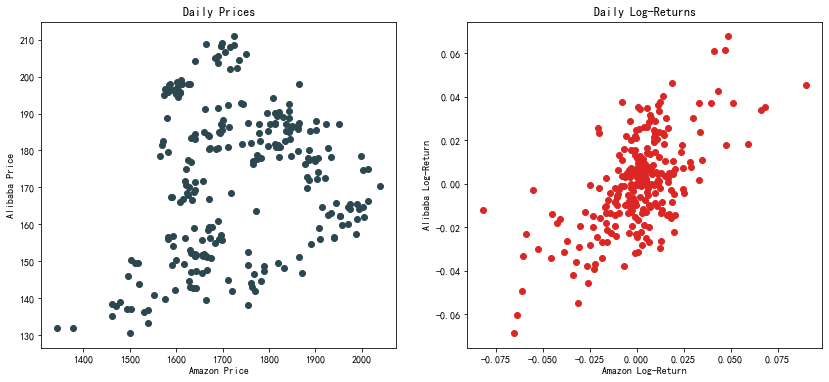

In [32]:
# 中美兩大電商亞馬遜 (AMZN) 和阿里巴巴 (BABA) 之間的價格和對數收益率的關聯
# 首先計算價格和對數收益率

# 設定顯示的字體，未設定會出現警告訊息
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False    # 解決無法正確顯示負號的問題

AMZN = data_converter(stock_daily, 'AMZN', 'EQ')
BABA = data_converter(stock_daily, 'BABA', 'EQ')

p_AMZN = AMZN['close']
p_BABA = BABA['close']

date = p_AMZN.index
price = p_AMZN.values
r_AMZN = pd.Series(np.log(price[1:]/price[:-1]), index=date[1:])

date = p_BABA.index
price = p_BABA.values
r_BABA = pd.Series(np.log(price[1:]/price[:-1]), index=date[1:])


# 用兩個子圖分別展示「價格」和「收益率」的散點圖
# 從右圖來看，亞馬遜和阿里巴巴在這端時期的表現正相關，如果做線性迴歸是一條斜率為正的線

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

axes[0].scatter(p_AMZN, p_BABA, color=dt_hex)
axes[0].set_xlabel('Amazon Price')
axes[0].set_ylabel('Alibaba Price')
axes[0].set_title('Daily Prices')

axes[1].scatter(r_AMZN, r_BABA, color=r_hex)
axes[1].set_xlabel('Amazon Log-Return')
axes[1].set_ylabel('Alibaba Log-Return')
axes[1].set_title('Daily Log-Returns')

plt.show()

# 折線圖 (line chart) 

顯示隨時間而變化的連續資料，適用於顯示在相等時間間隔下資料的趨勢

Matplotlib 語法：plt.plot()、ax.plot()

plot() 引數：
* rate, MA_20, MA_60 ：Series，也可以是 list 或者 ndarray
* colors ：用之前定義的深青色，紅色，綠色
* linewidth ：畫素 2
* label ：用於顯示圖例

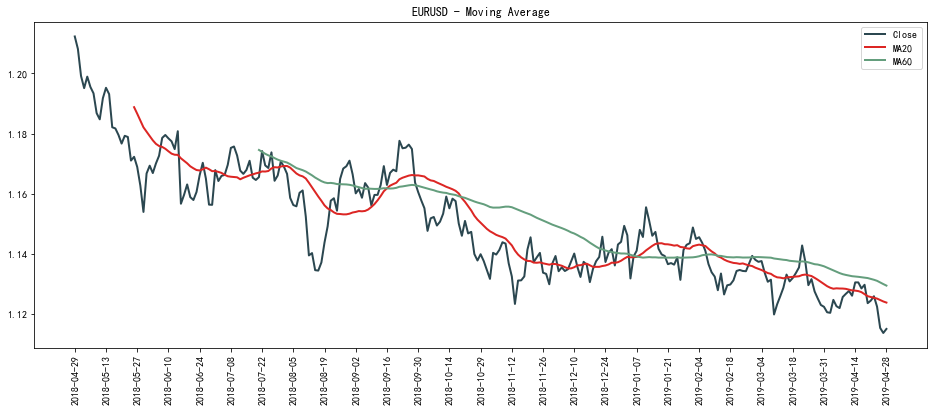

In [34]:
# EURUSD 20 天與 60 天移動平均 (moving average, MA) 線
# 用 Pandas 裡面的 rolling() 函式來計算 MA，再畫出收盤價，MA20 和 MA60 三條折線
# 雙均線策略：MA60 和 MA20 必有交點，若 20 天平均線「上穿越」 60 天均線，則為買入點，反之為賣出點
# 該策略基於不同天數均線的交叉點抓住股票的強勢和弱勢時刻進行交易


curr = 'EURUSD'
EURUSD = data_converter(currency_daily, curr, 'FX')
rate = EURUSD['close']

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1, 1, 1)

ax.set_title(curr + ' - Moving Average')
ax.set_xticks(range(0, len(rate.index), 10))
ax.set_xticklabels([rate.index[i] for i in ax.get_xticks()], rotation=90)

ax.plot(rate, color=dt_hex, linewidth=2, label='Close')

MA_20 = rate.rolling(20).mean()
MA_60 = rate.rolling(60).mean()

ax.plot(MA_20, color=r_hex, linewidth=2, label='MA20')
ax.plot(MA_60, color=g_hex, linewidth=2, label='MA60')

ax.legend(loc=0)

# 餅狀圖 (pie chart) 

劃分為幾個扇形的圓形統計圖表，用於描述量、頻率或百分比之間的相對關係。在餅狀圖中，每個扇區面積大小為其所表示的數量的比例

Matplotlib 語法：plt.pie()、ax.pie()

pie() 引數：
* MV ：股票組合市值，ndarray
* labels ：標識，list
* colors ：用之前定義的一組顏色，list
* autopct ： 顯示百分數的格式，str

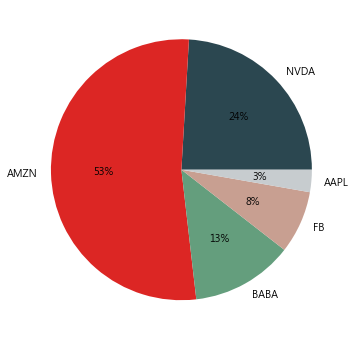

In [5]:
# 股票投資組合的餅狀圖

stock_list = ['NVDA', 'AMZN', 'BABA', 'FB', 'AAPL']
date = '2019-04-26'

# 使用列表解析式來獲取 stock_list 每支股票的價格
MV = [data_converter(stock_daily, code, 'EQ')['close'][date] for code in stock_list]

# 將價格乘上數量得到市值
MV = np.array(MV) * np.array([100,20,50,30,40])

# 設定好五種顏色和百分數格式 %.0f%%  (小數點後面保留 0 位)

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1, 1, 1)

ax.pie(MV, labels=stock_list, colors=[dt_hex,r_hex,g_hex,tn_hex,g25_hex], autopct='%.0f%%')

plt.show()

[39012.60009766 17808.99963379  9354.49981689  5744.70016479
  2043.00003052]
['AMZN', 'NVDA', 'BABA', 'FB', 'AAPL']


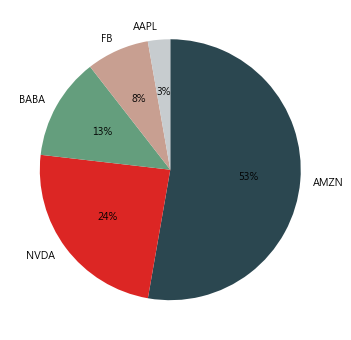

In [11]:
# 把餅當成鍾，大多數人習慣順時針的看裡面的內容
# 把面積最大的那塊的一條邊放在 12 點的位置最能突顯其重要性，之後按面積從大到小順時針排列
# 需要額外做兩件事：按升序排列股票的市值
# 設定 pie() 的相關引數達到上述「最大塊放 12 點位置」的效果


#首先按市值大小按升序排序
idx = MV.argsort()[::-1]
MV = MV[idx]
stock_list = [stock_list[i] for i in idx ]
print(MV)
print(stock_list)


# 設定引數
# startangle = 90 表示第一片扇形 (最大值 ) 的左邊在 90 度位置
# counterclock = False 是說順時針拜訪每塊扇形
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1, 1, 1)

ax.pie(MV, labels=stock_list, colors=[dt_hex,r_hex,g_hex,tn_hex,g25_hex], 
       autopct='%.0f%%', startangle=90, counterclock=False)

plt.show()

# 柱狀圖

當餅狀圖裡面扇形多過 5 個時，面積相近的扇形大小並不容易一眼辨別出來，這個時候用柱狀圖 (bar chart) 來代替餅狀圖，每個市值成分大小一目瞭然

柱狀圖：ax.bar()

bar() 引數：
* index： 橫軸刻度，ndarray
* pct_MV ：股票組合市值比例，ndarray
* facecolor ：柱狀顏色，紅色
* edgecolor ：柱邊顏色，深青色

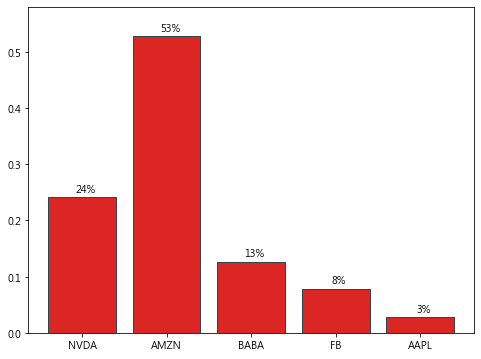

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

# 計算出市值的百分數
pct_MV = MV / np.sum(MV)
index = np.arange(len(pct_MV))

ax.bar(index, pct_MV, facecolor=r_hex, edgecolor=dt_hex)
ax.set_xticks(index)
ax.set_xticklabels(stock_list)
ax.set_ylim(0, np.max(pct_MV)*1.1)

# 在特定位置上 (x+0.04, y+0.05/100) 將 pct_MV 以 {0:.0%} 的格式 (不保留小數點) 寫出來
for x,y in zip(index, pct_MV):
    ax.text(x+0.04, y+0.4/100, '{0:.0%}'.format(y), ha='center', va='bottom')

plt.show()

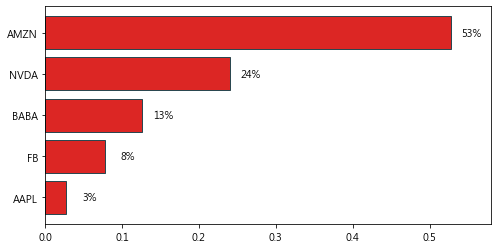

In [14]:
# 如果柱狀很多時，或者標籤名字很長時，用橫向柱狀圖 (horizontal bar chart)

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)

# 計算出市值的百分數
pct_MV = MV[::-1] / np.sum(MV)
index = np.arange(len(pct_MV))

ax.barh(index, pct_MV, facecolor=r_hex, edgecolor=dt_hex)
ax.set_yticks(index)
ax.set_yticklabels(stock_list[::-1])
ax.set_xlim(0, np.max(pct_MV)*1.1)

# 在特定位置上 (x+0.04, y+0.05/100) 將 pct_MV 以 {0:.0%} 的格式 (不保留小數點) 寫出來
for x,y in zip(pct_MV, index):
    ax.text(x+0.04, y, '{0:.0%}'.format(x), ha='right', va='center')

plt.show()

# 檢視 Matplotlib 的色彩風格

In [15]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


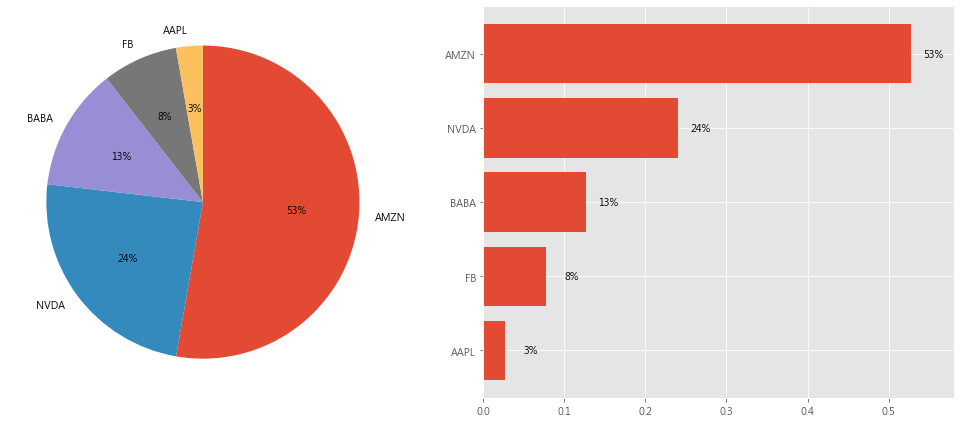

In [31]:
# seaborn-colorblind 和 tableau-colorblind10 為色盲設計的
plt.style.use('ggplot')
#plt.style.use('seaborn-colorblind')
#plt.style.use('tableau-colorblind10')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

axes[0].pie(MV, labels=stock_list, autopct='%.0f%%', startangle=90, counterclock=False)

pct_MV = MV[::-1] / np.sum(MV)
index = np.arange(len(pct_MV))

axes[1].barh(index, pct_MV)
axes[1].set_yticks(index)
axes[1].set_yticklabels(stock_list[::-1])
axes[1].set_xlim(0, np.max(pct_MV)*1.1)

for x,y in zip(pct_MV, index):
    axes[1].text(x+0.04, y, '{0:.0%}'.format(x), ha='right', va='center')


plt.tight_layout()
plt.show()